In [4]:
import sys
import requests
import os
import pandas as pd
import numpy as np
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_nlp_pkg')
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_model_explain_pkg')
import nlpbasic.textClean as textClean
import nlpbasic.docVectors as DocVector
import nlpbasic.dataExploration as DataExploration
import nlpbasic.lda as lda
import nlpbasic.tfidf as tfidf
import model_explain.plot as meplot
import model_explain.shap as meshap
import nlpbasic.extract_text_from_url as extract_txt
import data_visualization.seaborn_plt as snsplt
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\NLP_data\\BerkshireLetter'

Extract text file from url link: (berkshirehathaway annual letter).

Reference: https://medium.com/analytics-vidhya/best-nlp-algorithms-to-get-document-similarity-a5559244b23b

## Data Process

In [5]:
format1 = range(1977,1998,1)
format2 = [1998, 2000, 2001, 2002]
format3 = range(2003, 2021, 1)
for i in format1:
    filename = 'letter_' + str(i) +'.txt'
    filename = os.path.join(data_path, filename)
    print(filename)
    url_link = 'https://www.berkshirehathaway.com/letters/' + str(i) + '.html'
    extract_txt.extract_text_from_texturl(url_link, filename)
for i in format2:
    filename = 'letter_' + str(i) +'.txt'
    filename = os.path.join(data_path, filename)
    print(filename)
    url_link = 'https://www.berkshirehathaway.com/letters/' + str(i) + 'pdf.pdf'
    extract_txt.extract_text_from_pdfurl(url_link, filename)    
extract_txt.extract_text_from_pdfurl('https://www.berkshirehathaway.com/letters/final1999pdf.pdf', os.path.join(data_path, 'letter_1999.txt')) 
for i in format3:
    filename = 'letter_' + str(i) +'.txt'
    filename = os.path.join(data_path, filename)
    print(filename)
    url_link = 'https://www.berkshirehathaway.com/letters/' + str(i) + 'ltr.pdf'
    extract_txt.extract_text_from_pdfurl(url_link, filename)    

C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1977.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1978.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1979.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1980.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1981.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1982.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1983.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1984.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1985.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\letter_1986.txt
C:\Users\luoyan011\Desktop\PersonalLearning\GitHub\NLP_data\BerkshireLetter\lett

In [5]:
def get_letter_dict(letters_path,init_year=1977, end_year=2020):
    letters_dict = dict()
    letters_years = [year for year in range(init_year, end_year + 1)]
    for year in letters_years:
        filename = 'letter_' + str(year) + '.txt'
        path = os.path.join(letters_path, filename)
        letter = open(path,'r+', encoding='utf8').read()
        letters_dict[year] = letter
    return letters_dict

In [6]:
letters_dictionary = get_letter_dict(data_path,init_year=1977, end_year=2020)

In [7]:
letters = list(letters_dictionary.values())
yearid = list(letters_dictionary.keys())

In [21]:
frequent_words_list = ['year', 'business', 'berkshire', 'million', 'company', 'u',
                       'billion', 'tax', 'investment', 'share', 'last', 'value',
                       'would', 'many', 'operation', 'market', 'one', 'large', 'p',
                       'make', 'asset', 'also', 'see', 'even', 'well', 'two', 'made',
                       'pre', 'return', 'cost', 'capital', 'may', 'price', 'per', 'first',
                       'annual', 'though', 'however', 'time',
                       'manager', 'money', 'dollar', 'meeting',
                       'interest', 'great', 'group', 'come', 'far',
                       'long', 'worth', 'net', 'report', 'industry', 'put',
                       'contract', 'must', 'yearend', 'day', 'major', 'real', 'since',
                       'let', 'need', 'record', 'good', 'country', 'america', 'period',
                       'average', 'increased', 'home', 'run', 'way',
                       'world', 'second', 'four', 'product', 'largest', 'certain',
                       'financial', 'three',
                       'ago', 'almost', 'american',
                       'amount', 'area', 'b',
                       'believe', 'better', 'blue', 'board',
                       'book', 'borrower', 'brown', 'buffett', 'buyer',
                       'c', 'capacity', 'case', 'cash', 'casualty', 'cat', 'category',
                       'change', 'charge', 'chip', 'charlie',
                       'committee', 'common', 'controlled', 'corporate',
                       'corporation', 'could', 'coupon', 'customer', 'debt',
                       'director',
                       'every',
                       'fee', 'figure', 'find', 'five', 'float',
                       'fund', 'g',
                       'general', 'get', 'give', 'goodwill',
                       'h', 'hathaway', 'helper', 'high', 'holding',
                       'hour', 'housing', 'huge', 'important', 'inc', 'income',
                       'intrinsic',
                       'investor', 'k', 'know', 'le', 'like', 'line', 'look',
                       'low', 'management', 'medium', 'merger',
                       'mr', 'much', 'name', 'national', 'never',
                       'new', 'news', 'non', 'number', 'often', 'operating',
                       'others', 'owned', 'owner', 'ownership', 'page', 'paid',
                       'paper', 'past', 'pay', 'payment', 'people',
                       'preferred', 'premium',
                       'purchase', 'question',
                       'rather', 'ratio',
                       'reported', 'reserve', 'result', 'retained',
                       'rule', 'say',
                       'september', 'service', 'shoe',
                       'star', 'state', 'store', 'subsidiary', 'sunday', 'super',
                       'take', 'ten', 'th', 'eht',
                       'therefore', 'utility', 'volume',
                       'zero']

In [22]:
preprocessed_text = textClean.pipeline(letters, multi_gram = [1], lower_case=True, deacc=False, encoding='utf8',
                                       errors='strict', stem_lemma = 'lemma', tag_drop = [], nltk_stop=True, 
                                       stop_word_list=frequent_words_list, remove_pattern = ['www'],
                                       check_numbers=True, word_length=2, remove_consecutives=True)
preprocessed_text = [' '.join(i) for i in preprocessed_text]

In [23]:
processed_letter = {
    'year': yearid,
    'clean_letter': preprocessed_text
}
processed_letter_df = pd.DataFrame(processed_letter, columns = ['year', 'clean_letter'])
processed_letter_df.to_csv(os.path.join(data_path, 'processed_letter.csv'))

## Data Exploration

In [24]:
processed_letter_df['tokens'] = processed_letter_df.clean_letter.apply(lambda x: x.split(' '))

In [26]:
top_10_freq_words = [i[0] for i in DataExploration.get_topn_freq_bow(processed_letter_df['tokens'].to_list(), topn = 10)]
print(top_10_freq_words)

['earnings', 'insurance', 'shareholder', 'stock', 'loss', 'gain', 'profit', 'increase', 'sell', 'rate']


In [27]:
top30tfidf = tfidf.get_top_n_tfidf_bow(processed_letter_df['tokens'].to_list(), top_n_tokens = 30)
print('top 30 tfidf', top30tfidf)


top 30 tfidf ['font', 'justify', 'era', 'arbitrage', 'derivative', 'bhe', 'ton', 'fetzer', 'passive', 'align', 'smith', 'dexter', 'hedge', 'walter', 'saw', 'usair', 'wppss', 'gold', 'clayton', 'dairy', 'stamp', 'gift', 'fruit', 'ralph', 'deficit', 'bnsf', 'kraft', 'acquirer', 'em', 'finova']


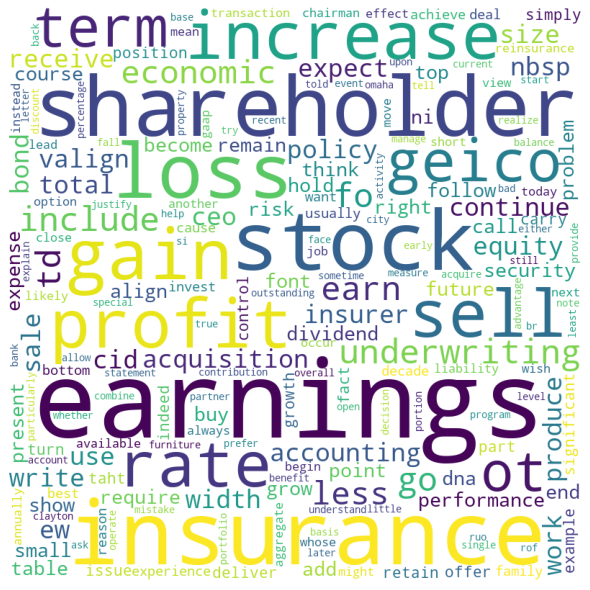

In [28]:
DataExploration.generate_word_cloud(processed_letter_df['tokens'].to_list())

In [29]:
no_topics = 10
lda_allbow, bow_corpus, dictionary = lda.fit_lda(processed_letter_df['tokens'].to_list(), num_topics = no_topics)
lda.lda_topics(lda_allbow)

,Topics,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1,clayton,midamerican,derivative,align,heinz,kraft,independent,netjets,shaw,treasury
1,2,clayton,midamerican,error,font,bnsf,inmillions,derivative,wppss,journalist,allocation
2,3,derivative,auditor,gift,dexter,align,coke,peter,independent,borsheim,governance
3,4,align,justify,penetration,franchise,wesco,louie,font,nominal,blumkin,carpet
4,5,wesco,stamp,gtag,align,datalayer,undistributed,underlie,phil,cent,passive
5,6,fetzer,derivative,align,usair,clayton,ralph,borsheim,gillette,fargo,earthquake
6,7,clayton,era,midamerican,ton,borsheim,saw,arbitrage,fetzer,netjets,gillette
7,8,font,align,fetzer,justify,midamerican,gillette,clayton,shaw,borsheim,error
8,9,clayton,midamerican,bnsf,ton,derivative,saw,weekend,inmillions,era,electric
9,10,font,align,justify,fetzer,symbol,fechheimer,kirby,franchise,allocation,column


### Words Frequency

In [30]:
dictionary = DocVector.generate_corpus_dict(processed_letter_df['tokens'].to_list(), no_below =1,
                                            no_above = 1, keep_n = 100000)
bow_corpus = DocVector.create_document_vector(processed_letter_df['tokens'].to_list(), dictionary)
my_df = DocVector.get_vocab_matrix(bow_corpus, dictionary)

In [31]:
test = my_df[top_10_freq_words]
test.index = yearid
test = test.T

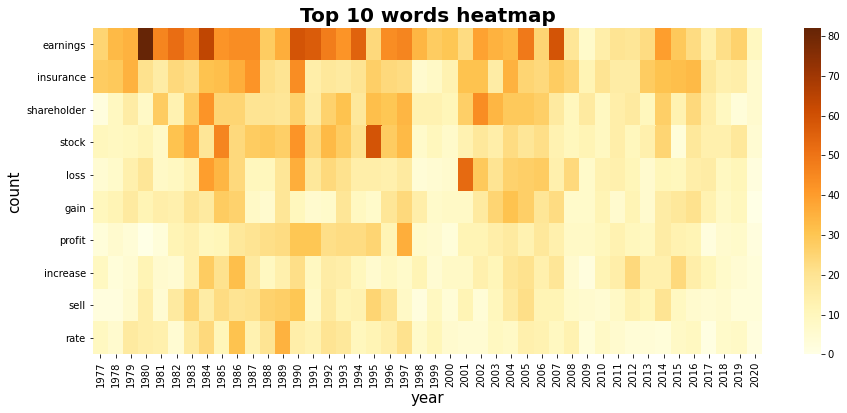

In [32]:
snsplt.plot_heatmap(test, x='year', y='count', title = 'Top 10 words heatmap')